<a href="https://colab.research.google.com/github/BrianLahr/Machine-Learning/blob/main/Implementa%C3%A7%C3%A3o_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de Bibliotecas

In [2]:
import pandas as pd         # Used for data analysis and manipulation, for example, reading .csv files
import numpy as np          # Useful to work with arrays and matrices, tools in the field of linear algebra
#from keras import layers
#from keras import models
import tensorflow as tf     # Used for fast numerical computing, and also creating deep learning models/networks
from time import time       # Used to represent time in many ways, as well as measuring the efficiency of the code

In [3]:
import matplotlib.pyplot as plt 

In [4]:
from sklearn.neural_network import MLPRegressor

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
from tensorflow.keras.layers import Dense, Input, Concatenate, Layer
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_excel('/content/drive/MyDrive/Tudin/IC/Fortulan/R_e_X_tracos.xlsx')

In [11]:
df.head()

,frequency,R,X,a,c,a_c
0,40.000,8.476290,-2.977194,0.451948,0.071414,0.45
1,53.784,8.259911,-2.391099,0.451948,0.071414,0.45
2,72.318,8.079077,-1.922352,0.451948,0.071414,0.45
3,97.238,7.927038,-1.552142,0.451948,0.071414,0.45
4,130.746,7.800076,-1.252480,0.451948,0.071414,0.45


In [12]:
df_novo = df.drop(columns='a_c')

In [13]:
df_novo.head()

,frequency,R,X,a,c
0,40.000,8.476290,-2.977194,0.451948,0.071414
1,53.784,8.259911,-2.391099,0.451948,0.071414
2,72.318,8.079077,-1.922352,0.451948,0.071414
3,97.238,7.927038,-1.552142,0.451948,0.071414
4,130.746,7.800076,-1.252480,0.451948,0.071414


# Análise e Pré-Processamento dos Dados

In [50]:
#from sklearn.model_selection import RepeatedKFold
#from keras.models import Sequential
#from keras.layers import Dense
from sklearn.model_selection import train_test_split

# We want our model to learn from three features (frequency, R and X) and predict two target features (a and c).
# It will be only supervised learning, and we should care for overfitting.

In [51]:
# Split the data into train and test with 80 train / 20 test
train,test = train_test_split(df_novo, test_size=0.2, random_state = 1)
train,val = train_test_split(train, test_size=0.2, random_state = 1)

In [52]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

ct = make_column_transformer((MinMaxScaler(), ["frequency", "R", "X"]))

In [53]:
X = df_novo.drop(columns=['a', 'c'])
X

,frequency,R,X
0,4.000000e+01,8.476290,-2.977194
1,5.378400e+01,8.259911,-2.391099
2,7.231800e+01,8.079077,-1.922352
3,9.723800e+01,7.927038,-1.552142
4,1.307460e+02,7.800076,-1.252480
...,...,...,...
1195,2.447486e+07,-4.024560,-5.913289
1196,3.290885e+07,-4.872946,-5.100729
1197,4.424917e+07,-5.408673,-4.369017
1198,5.949734e+07,-5.171310,-3.998801


In [54]:
y = df_novo.drop(columns=['frequency', 'R', 'X'])
y

,a,c
0,0.451948,0.071414
1,0.451948,0.071414
2,0.451948,0.071414
3,0.451948,0.071414
4,0.451948,0.071414
...,...,...
1195,0.948357,0.086107
1196,0.948357,0.086107
1197,0.948357,0.086107
1198,0.948357,0.086107


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train.head()

,frequency,R,X
331,387637.610,6.842037,-0.558413
409,574.635,8.166016,-0.431007
76,88199.000,8.767646,-0.171102
868,8255.133,10.126633,-0.106626
138,3080158.387,6.995666,-4.279688


In [57]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['frequency', 'R', 'X'])])

In [58]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [59]:
X_test_normal[0]

array([0.00199274, 0.78749856, 0.97361561])

In [60]:
X_train_normal.shape, X_train.shape

((960, 3), (960, 3))

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled= sc.transform(X_test)

# Modelo 1

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
model_1 = tf.keras.Sequential([
    
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history = model_1.fit(X_train_normal, y_train, epochs=200, verbose=0) 

In [ ]:
model_1_loss, model_1_mae = model_1.evaluate(X_test_normal, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.3070 - mae: 0.3070


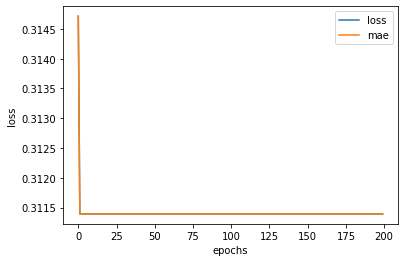

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

* Model 1: Didn't work for some reason; loss does not update after the first iteration (as it already happened).

In [ ]:
model_1_loss, model_1_mae = model_1.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 1590150.5000 - mae: 1590150.5000


# Modelo 2

In [ ]:
def build_model_2(num_hidden_layers):

    # Set random seed
    tf.random.set_seed(42)
    
    model = tf.keras.Sequential()

    model.add(tf.keras.Input(3))

    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(100,
                            activation=tf.keras.activations.get('relu'),
                            kernel_initializer='glorot_normal'))

    model.add(tf.keras.layers.Dense(2))

    return model

In [ ]:
hidden_layers = 3
model_2 = build_model_2(hidden_layers)

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

In [ ]:
# Fit the model for 200 epochs (same as insurance_model_2)
history_2 = model_2.fit(X_train_normal, y_train, epochs=200, verbose=0) 

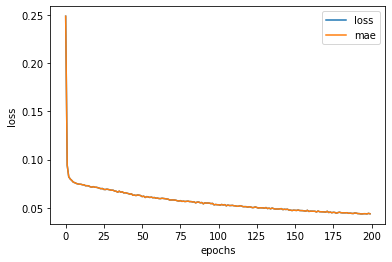

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model_2_loss, model_2_mae = model_2.evaluate(X_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 1124173.7500 - mae: 1124173.7500


# Modelo 3

In [ ]:
def build_model_3(num_hidden_layers):

    # Set random seed
    tf.random.set_seed(42)
    
    model = tf.keras.Sequential()

    model.add(tf.keras.Input(3))

    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(10,
                            activation=tf.keras.activations.get('relu'),
                            kernel_initializer='glorot_normal'))

    model.add(tf.keras.layers.Dense(2))

    return model

In [ ]:
hidden_layers = 2
model_3 = build_model_3(hidden_layers)

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

In [ ]:
# Fit the model for 200 epochs (same as insurance_model_2)
history_3 = model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

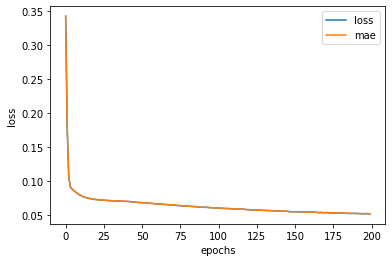

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model_3_loss, model_3_mae = model_3.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 740499.6875 - mae: 740499.6875


In [ ]:
# Compile the model
model_3.compile(loss=tf.keras.losses.mse,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mse'])

In [ ]:
# Fit the model for 200 epochs (same as insurance_model_2)
history_3_2 = model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

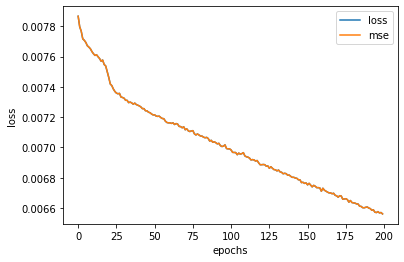

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_3_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model_3_2_loss, model_3_mse = model_3.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 1931683299328.0000 - mse: 1931683299328.0000


# Modelo 4

In [ ]:
def build_model_4(num_hidden_layers):

    # Set random seed
    #tf.random.set_seed(42)
    
    model = tf.keras.Sequential()

    model.add(tf.keras.Input(3))

    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(2,
                            activation=tf.keras.activations.get('relu'),
                            kernel_initializer='glorot_normal'))

    model.add(tf.keras.layers.Dense(2))

    return model

In [ ]:
hidden_layers = 2
model_4 = build_model_4(hidden_layers)

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_4 = model_4.fit(X_train_normal, y_train, epochs=200, verbose=0) 

# Plot history (also known as a loss curve)
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

KeyboardInterrupt: ignored

In [ ]:
model_4_loss, model_4_mae = model_4.evaluate(X_test, y_test)

In [ ]:
hidden_layers = 2
model_4 = build_model_4(hidden_layers)

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

history_4_2 = model_4.fit(X_train_normal, y_train, epochs=50, verbose=0) 

# Plot history (also known as a loss curve)
pd.DataFrame(history_4_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model_4_loss, model_4_mae = model_4.evaluate(X_test, y_test)

# Modelo 5

In [ ]:
def build_model_5():

    # Set random seed
    #tf.random.set_seed(42)
    
    model = tf.keras.Sequential()

    model.add(tf.keras.Input(3))

    model.add(tf.keras.layers.Dense(2))

    return model

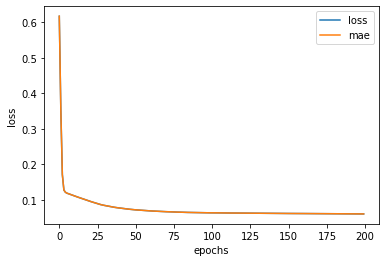

In [ ]:
model_5 = build_model_5()

# Compile the model
model_5.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_5 = model_5.fit(X_train_normal, y_train, epochs=200, verbose=0) 

# Plot history (also known as a loss curve)
pd.DataFrame(history_5.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model_5_loss, model_5_mae = model_5.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 1517024.1250 - mae: 1517024.1250


# Modelo 6

In [ ]:
def build_model_6(num_hidden_layers):

    # Set random seed
    tf.random.set_seed(42)
    
    model = tf.keras.Sequential()

    model.add(tf.keras.Input(3))

    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(2,
                            activation=tf.keras.activations.get('tanh'),
                            kernel_initializer='glorot_normal'))

    model.add(tf.keras.layers.Dense(2))

    return model

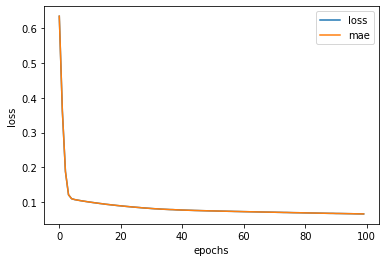

In [ ]:
hidden_layers = 1
model_6 = build_model_6(hidden_layers)

# Compile the model
model_6.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

history_6 = model_6.fit(X_train_normal, y_train, epochs=100, verbose=0) 

# Plot history (also known as a loss curve)
pd.DataFrame(history_6.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model_6_loss, model_6_mae = model_6.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.1601 - mae: 0.1601


In [ ]:
previsoes = model_6.predict(X_test)
type(previsoes)

8/8 [==============================] - 0s 1ms/step


numpy.ndarray

# Modelo 7

In [ ]:
def build_model_7(num_hidden_layers):

    # Set random seed
    tf.random.set_seed(42)
    
    model = tf.keras.Sequential()

    model.add(tf.keras.Input(3))

    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(2,
                            activation=tf.keras.activations.get('sigmoid'),
                            kernel_initializer='glorot_normal'))

    model.add(tf.keras.layers.Dense(2))

    return model

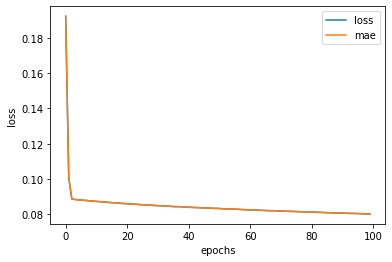

In [ ]:
hidden_layers = 1
model_7 = build_model_7(hidden_layers)

# Compile the model
model_7.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

history_7 = model_7.fit(X_train_normal, y_train, epochs=100, verbose=0) 

# Plot history (also known as a loss curve)
pd.DataFrame(history_7.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model_7_loss, model_7_mae = model_7.evaluate(X_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.1382 - mae: 0.1382


In [ ]:
previsoes = model_7.predict(X_test)
print(previsoes)

In [ ]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 2)                 8         
                                                                 
 dense_16 (Dense)            (None, 2)                 6         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


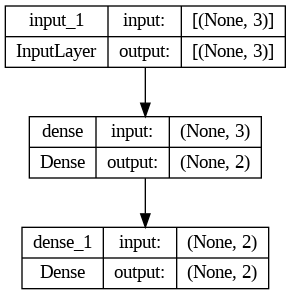

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model_7, show_shapes=True)

# Modelo 8

In [ ]:
def build_model_8(num_hidden_layers):

    # Set random seed
    tf.random.set_seed(42)
    
    model = tf.keras.Sequential()

    model.add(tf.keras.Input(3))

    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(15,
                            activation=tf.keras.activations.get('sigmoid'),
                            kernel_initializer='glorot_normal'))

    model.add(tf.keras.layers.Dense(2))

    return model

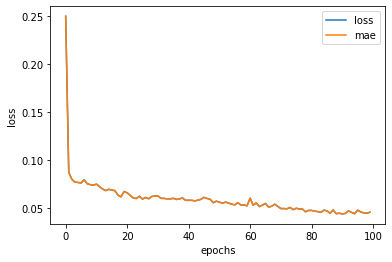

In [ ]:
hidden_layers = 2
model_8 = build_model_8(hidden_layers)

# Compile the model
model_8.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['mae'])

history_8 = model_8.fit(X_train_normal, y_train, epochs=100, verbose=0) 

# Plot history (also known as a loss curve)
pd.DataFrame(history_8.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model_8_loss, model_8_mae = model_8.evaluate(X_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.1082 - mae: 0.1082


In [ ]:
previsoes = model_8.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [ ]:
print(previsoes)

[[0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.752255   0.07888789]
 [0.54662734 0.03805742]
 [0.7365857  0.08463833]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662806 0.03805765]
 [0.74660975 0.0863986 ]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54947275 0.03894971]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.5987853  0.05338432]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.6824939  0.07381173]
 [0.54662734 0.03805742]
 [0.5466273  0.03805739]
 [0.5466273  0.03805739]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.54662734 0.03805742]
 [0.74878407 0.08331382]


# Modelo 9

In [ ]:
def build_model_9(num_hidden_layers):

    # Set random seed
    tf.random.set_seed(42)
    
    model = tf.keras.Sequential()

    model.add(tf.keras.Input(3))

    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(20,
                            activation=tf.keras.activations.get('sigmoid'),
                            kernel_initializer='glorot_normal'))

    model.add(tf.keras.layers.Dense(2))

    return model

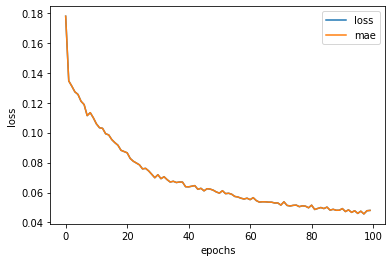

In [ ]:
hidden_layers = 2
model_9 = build_model_9(hidden_layers)

# Compile the model
model_9.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
                        metrics=['mae'])

history_9 = model_9.fit(X_train_normal, y_train, epochs=100, verbose=0) 

# Plot history (also known as a loss curve)
pd.DataFrame(history_9.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model_9_loss, model_9_mae = model_9.evaluate(X_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.0857 - mae: 0.0857


In [ ]:
previsoes = model_9.predict(X_test)
previsoes

8/8 [==============================] - 0s 2ms/step


array([[0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.87918943, 0.06939279],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.6860921 , 0.07209799],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.61438435, 0.07296003],
       [0.

# Modelo 10

In [ ]:
def build_model_10():

    # Set random seed
    tf.random.set_seed(42)

    m10_input_layer = Input(3)
    m10_dense_layer_1 = Dense(32, activation='relu')(m10_input_layer)
    m10_dense_layer_2 = Dense(16, activation='relu')(m10_input_layer)
    m10_merged_layer = Concatenate()([m10_dense_layer_1, m10_dense_layer_2])
    m10_final_layer = Dense(2, activation='softmax')(m10_merged_layer)

    model = Model(inputs=m10_input_layer, outputs=m10_final_layer, name="Model_2")   

    return model

In [ ]:
model_10 = build_model_10()

model_10.save_weights("./model_10_initial_weights.h5")

Model: "Model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 3)]          0           []                               
                                                                                                  
 dense_50 (Dense)               (None, 32)           128         ['input_17[0][0]']               
                                                                                                  
 dense_51 (Dense)               (None, 16)           64          ['input_17[0][0]']               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 48)           0           ['dense_50[0][0]',               
                                                                  'dense_51[0][0]']         

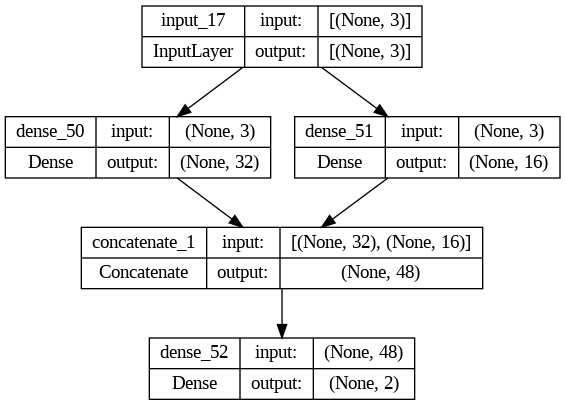

In [ ]:
model_10.summary()
plot_model(model_10, 'model_10.png', show_shapes=True)

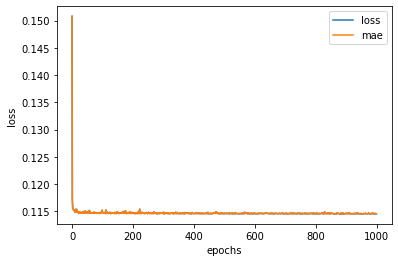

In [ ]:
# Compile the model
model_10.load_weights("./model_10_initial_weights.h5")
model_10.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['mae'])

history_10 = model_10.fit(X_train_normal, y_train, epochs=1000, verbose=0) 

# Plot history (also known as a loss curve)
pd.DataFrame(history_10.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model_10_loss, model_10_mae = model_10.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.1930 - mae: 0.1930


In [ ]:
previsoes = model_10.predict(X_test)
previsoes

8/8 [==============================] - 0s 2ms/step


array([[9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 1.1591939e-36],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 1.8802266e-32],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 1.4342180e-35],
       [9.9999994e-01, 1.5807905e-35],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 1.1378895e-26],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 1.0358436e-32],
       [9.9999994e-01, 0.

# Modelo 1 para 'a_c'

In [ ]:
def build_model_1_a_c(num_hidden_layers):

    # Set random seed
    tf.random.set_seed(42)
    
    model = tf.keras.Sequential()

    model.add(tf.keras.Input(3))

    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(15,
                            activation=tf.keras.activations.get('sigmoid'),
                            kernel_initializer='glorot_normal'))

    model.add(tf.keras.layers.Dense(1))

    return model

In [ ]:
y_a_c = df.drop(columns=['frequency', 'R', 'X', 'a', 'c'])

In [ ]:
y_train_a_c, y_test_a_c = train_test_split(y_a_c, test_size=0.2, random_state=42)

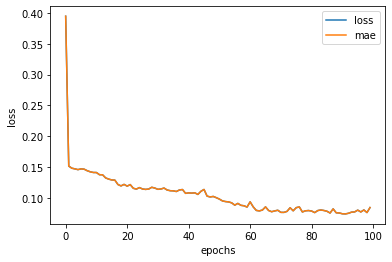

In [ ]:
hidden_layers = 2
model_1_a_c = build_model_1_a_c(hidden_layers)

# Compile the model
model_1_a_c.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['mae'])

history_1_a_c = model_1_a_c.fit(X_train_normal, y_train_a_c, epochs=100, verbose=0) 

# Plot history (also known as a loss curve)
pd.DataFrame(history_1_a_c.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model_1_a_c_loss, model_1_a_c_mae = model_1_a_c.evaluate(X_test, y_test_a_c)

8/8 [==============================] - 0s 2ms/step - loss: 0.1754 - mae: 0.1754


In [ ]:
previsoes = model_1_a_c.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [ ]:
print(previsoes)

[[0.6959852 ]
 [0.6959852 ]
 [0.9220896 ]
 [0.6959852 ]
 [0.913106  ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.69824946]
 [0.91315454]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.8541102 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.9117016 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.9123985 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.69598603]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.9131537 ]
 [0.6959852 ]
 [0.9131441 ]
 [0.91310436]
 [0.91314983]
 [1.1623423 ]
 [0.6959852 ]
 [0.91315293]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.9140622 ]
 [0.6959852 ]
 [0.88960284]
 [0.91315454]
 [0.91085166]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.93081135]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.6959852 ]
 [0.69

# MLP Regressor 1 - MAPE 13.08%

In [ ]:
regressor_MLP_1 = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000)

In [ ]:
model_MLP_1 = regressor_MLP_1.fit(X_train_scaled, y_train)

In [ ]:
y_pred=regressor_MLP_1.predict(X_test_scaled)
y_pred

array([[0.75721104, 0.07285361],
       [0.87467653, 0.07243605],
       [0.75392622, 0.08341373],
       [0.6386988 , 0.05305362],
       [0.74895111, 0.07190606],
       [0.73301068, 0.07778979],
       [0.54985443, 0.0950027 ],
       [0.54613223, 0.09517879],
       [0.65692267, 0.08325601],
       [0.88669251, 0.07224632],
       [0.80813035, 0.07110189],
       [0.65875661, 0.06370273],
       [0.74400885, 0.09402944],
       [0.76434245, 0.09208266],
       [0.89287741, 0.09485264],
       [0.83684838, 0.07121138],
       [0.88803834, 0.07438951],
       [0.75180947, 0.07483409],
       [0.7278269 , 0.0477672 ],
       [0.6531219 , 0.08604891],
       [0.55145581, 0.09142519],
       [0.49030993, 0.0981679 ],
       [0.52407661, 0.09648708],
       [0.65333824, 0.0663496 ],
       [0.71261257, 0.07577274],
       [1.00016029, 0.0866313 ],
       [0.51961516, 0.09658851],
       [0.9411573 , 0.08035607],
       [0.5811345 , 0.08833048],
       [0.66781724, 0.0621729 ],
       [0.

In [ ]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.1308460440052406


# MLP Regressor 2 - MAPE 7.60%

In [48]:
regressor_MLP_2 = MLPRegressor(hidden_layer_sizes=(100,100,100), activation='relu', solver='lbfgs', 
                               alpha=0.0001, batch_size='auto', learning_rate='constant', 
                               learning_rate_init=0.01, max_iter=2000, random_state=42, 
                               momentum=0.9, early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                               beta_2=0.999, epsilon=1e-08)

In [63]:
model_MLP_2 = regressor_MLP_2.fit(X_train_scaled, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
y_test

,a,c
1178,0.948357,0.086107
865,0.950980,0.082140
101,0.649254,0.071889
439,0.650177,0.076906
58,0.550633,0.071698
...,...,...
382,0.549254,0.076634
867,0.950980,0.082140
542,0.851852,0.077248
1193,0.948357,0.086107


In [65]:
y_pred=regressor_MLP_2.predict(X_test_scaled)
y_pred

array([[0.92140641, 0.08637812],
       [0.88788181, 0.07736228],
       [0.80479317, 0.08071184],
       [0.70976115, 0.08087108],
       [0.75608066, 0.07796904],
       [0.7115237 , 0.07788442],
       [0.50231942, 0.08010868],
       [0.51678659, 0.08128275],
       [0.69069065, 0.08232042],
       [0.86559982, 0.076724  ],
       [0.83220023, 0.08044777],
       [0.46487011, 0.08188852],
       [0.3148227 , 0.07056378],
       [0.9044493 , 0.08406413],
       [0.87801592, 0.07316126],
       [0.7287472 , 0.0709649 ],
       [0.87275989, 0.07579068],
       [0.7489601 , 0.07915017],
       [0.86768688, 0.0791117 ],
       [0.69044333, 0.08099682],
       [0.55641331, 0.08072778],
       [0.44285418, 0.08239574],
       [0.5371631 , 0.08392989],
       [0.46231749, 0.08459512],
       [0.72702341, 0.08178814],
       [0.95566611, 0.07190707],
       [0.52698638, 0.08334975],
       [0.94194848, 0.07857576],
       [0.57478233, 0.08125649],
       [0.953888  , 0.0762604 ],
       [0.

In [66]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.07600755824297525


In [ ]:
print(mean_squared_error(y_test, y_pred, squared=False))

0.04498614890123441


In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['a', 'c'])
y_pred_df

,a,c
0,0.921406,0.086378
1,0.887882,0.077362
2,0.804793,0.080712
3,0.709761,0.080871
4,0.756081,0.077969
...,...,...
235,0.594136,0.084146
236,0.890498,0.077580
237,0.905999,0.072608
238,0.806876,0.082764


In [64]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor_MLP_2, X_train_scaled, y_train, cv=5)
print(scores)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[0.33482675 0.31195792 0.19318994 0.40213576 0.20588236]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# MLP Regressor 3 com resultado do GridSearchCV

In [ ]:
parameters = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd', 'lbfgs'],
              'batch_size': [10, 50, 100, 200, 250],
              'learning_rate_init': [0.1, 0.01, 0.001, 0.05, 0.005, 0.5],
              'learning_rate': ['constant', 'adaptative']}

grid_search = GridSearchCV(estimator=regressor_MLP_2, param_grid=parameters)
grid_search.fit(X_train, y_train)

melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning

In [ ]:
grid_search.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__activation', 'estimator__alpha', 'estimator__batch_size', 'estimator__beta_1', 'estimator__beta_2', 'estimator__early_stopping', 'estimator__epsilon', 'estimator__hidden_layer_sizes', 'estimator__learning_rate', 'estimator__learning_rate_init', 'estimator__max_fun', 'estimator__max_iter', 'estimator__momentum', 'estimator__n_iter_no_change', 'estimator__nesterovs_momentum', 'estimator__power_t', 'estimator__random_state', 'estimator__shuffle', 'estimator__solver', 'estimator__tol', 'estimator__validation_fraction', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [ ]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'logistic', 'batch_size': 10, 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'solver': 'sgd'}
-0.004136423165958014


In [ ]:
regressor_MLP_3 = MLPRegressor(hidden_layer_sizes=(100,100,100), activation='logistic', solver='sgd', 
                               alpha=0.0001, batch_size=10, learning_rate='constant', 
                               learning_rate_init=0.1, max_iter=2000, random_state=42, 
                               momentum=0.9, early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                               beta_2=0.999, epsilon=1e-08)

In [ ]:
model_MLP_3 = regressor_MLP_2.fit(X_train_scaled, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
y_pred=regressor_MLP_2.predict(X_test_scaled)
y_pred

array([[0.92140641, 0.08637812],
       [0.88788181, 0.07736228],
       [0.80479317, 0.08071184],
       [0.70976115, 0.08087108],
       [0.75608066, 0.07796904],
       [0.7115237 , 0.07788442],
       [0.50231942, 0.08010868],
       [0.51678659, 0.08128275],
       [0.69069065, 0.08232042],
       [0.86559982, 0.076724  ],
       [0.83220023, 0.08044777],
       [0.46487011, 0.08188852],
       [0.3148227 , 0.07056378],
       [0.9044493 , 0.08406413],
       [0.87801592, 0.07316126],
       [0.7287472 , 0.0709649 ],
       [0.87275989, 0.07579068],
       [0.7489601 , 0.07915017],
       [0.86768688, 0.0791117 ],
       [0.69044333, 0.08099682],
       [0.55641331, 0.08072778],
       [0.44285418, 0.08239574],
       [0.5371631 , 0.08392989],
       [0.46231749, 0.08459512],
       [0.72702341, 0.08178814],
       [0.95566611, 0.07190707],
       [0.52698638, 0.08334975],
       [0.94194848, 0.07857576],
       [0.57478233, 0.08125649],
       [0.953888  , 0.0762604 ],
       [0.

In [ ]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.07600755824297525


# MLP Regressor 1 para 'a' - MAPE 10.14%

In [ ]:
df_a = df_novo.drop(columns='c')

In [ ]:
regressor_MLP_a_1 = MLPRegressor(hidden_layer_sizes=(100,100,100), activation='relu', solver='lbfgs', 
                               alpha=0.0001, batch_size='auto', learning_rate='constant', 
                               learning_rate_init=0.05, max_iter=2000, random_state=42, 
                               momentum=0.9, early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                               beta_2=0.999, epsilon=1e-08)

In [ ]:
y_train_a = y_train.drop(columns='c')

In [ ]:
y_test_a = y_test.drop(columns='c')

In [ ]:
model_MLP_a_1 = regressor_MLP_a_1.fit(X_train_scaled, y_train_a.values.ravel())

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
y_pred_a = regressor_MLP_a_1.predict(X_test_scaled)
y_pred_a

array([0.90613919, 0.89353899, 0.80967139, 0.64814066, 0.77057303,
       0.70483253, 0.49637052, 0.51021646, 0.72319347, 0.85621981,
       0.84494113, 0.46650454, 0.24725083, 0.90901419, 0.8783665 ,
       0.75429364, 0.87460333, 0.71147517, 0.84822384, 0.67937371,
       0.56497975, 0.45100838, 0.54551302, 0.46722846, 0.70729583,
       0.94826897, 0.53252956, 0.94106795, 0.58035468, 1.01626835,
       0.55381845, 0.85065453, 0.52448152, 0.63472662, 0.58929337,
       0.83005047, 0.70023943, 0.69805506, 0.48602389, 0.43180665,
       0.71248184, 0.71157628, 0.75550553, 0.5570128 , 0.77781702,
       0.54198524, 0.53256557, 0.51184294, 0.48128713, 0.81271316,
       0.56249032, 0.65838389, 0.56657276, 0.74696553, 0.69704335,
       0.57444783, 0.47174791, 0.96279358, 0.52563297, 0.54110801,
       0.53498919, 0.87003434, 0.91259468, 0.72804723, 0.75372966,
       0.47723161, 0.75394151, 0.69817415, 0.9322794 , 0.71083548,
       0.68601024, 0.69144188, 0.78971831, 0.69262891, 0.71577

In [ ]:
print(mean_absolute_percentage_error(y_test_a, y_pred_a))

0.10137070674757888


In [ ]:
y_test_a.values.ravel()

array([0.94835681, 0.95098039, 0.64925373, 0.65017668, 0.55063291,
       0.8487395 , 0.44987775, 0.55040872, 0.65017668, 0.95098039,
       0.85087719, 0.45194805, 0.45194805, 0.85087719, 0.84878049,
       0.75      , 0.85185185, 0.74903475, 0.85087719, 0.65017668,
       0.54925373, 0.45011601, 0.54957507, 0.44987775, 0.64925373,
       0.95081967, 0.54957507, 0.94845361, 0.54925373, 0.94845361,
       0.54925373, 0.95098039, 0.54957507, 0.65100671, 0.54925373,
       0.94845361, 0.65017668, 0.55063291, 0.44987775, 0.54957507,
       0.75092937, 0.64925373, 0.8487395 , 0.54925373, 0.55040872,
       0.44987775, 0.54925373, 0.45194805, 0.45194805, 0.84878049,
       0.65100671, 0.8487395 , 0.54925373, 0.75      , 0.8487395 ,
       0.44987775, 0.55040872, 0.94835681, 0.64951768, 0.54925373,
       0.44987775, 0.75      , 0.84878049, 0.55063291, 0.75      ,
       0.55040872, 0.55063291, 0.65017668, 0.85185185, 0.75102041,
       0.65017668, 0.64925373, 0.94835681, 0.55063291, 0.55063

# MLP Regressor 2 para 'a' com GridSearch - MAPE 12.20%

In [ ]:
parameters = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd', 'lbfgs'],
              'batch_size': [10, 50, 100, 200, 250],
              'learning_rate_init': [0.1, 0.01, 0.001, 0.05, 0.005, 0.5],
              'learning_rate': ['constant', 'adaptative']}

grid_search = GridSearchCV(estimator=regressor_MLP_a_1, param_grid=parameters)
grid_search.fit(X_train, y_train_a.values.ravel())

melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitte

In [ ]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'logistic', 'batch_size': 50, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
-0.006409738765044293


In [ ]:
regressor_MLP_a_2 = MLPRegressor(hidden_layer_sizes=(100,100,100), activation='logistic', solver='adam', 
                               alpha=0.0001, batch_size=50, learning_rate='constant', 
                               learning_rate_init=0.001, max_iter=2000, random_state=42, 
                               momentum=0.9, early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                               beta_2=0.999, epsilon=1e-08)

In [ ]:
model_MLP_a_2 = regressor_MLP_a_2.fit(X_train_scaled, y_train_a.values.ravel())

In [ ]:
y_pred_a = regressor_MLP_a_2.predict(X_test_scaled)
y_pred_a

array([0.77247775, 0.88027578, 0.77117123, 0.65628113, 0.7654271 ,
       0.73700324, 0.54699461, 0.54458351, 0.67224957, 0.92070089,
       0.80758425, 0.64773809, 0.72567654, 0.73143976, 0.84381008,
       0.83594016, 0.89407701, 0.75622041, 0.72769771, 0.66279967,
       0.58541917, 0.49364679, 0.52162133, 0.63617881, 0.72785771,
       1.01634117, 0.5211104 , 0.94593286, 0.60655409, 0.70778223,
       0.65420394, 0.81184632, 0.66588045, 0.62742478, 0.59808873,
       0.70159659, 0.66091314, 0.74699745, 0.54790565, 0.57397194,
       0.69139629, 0.73506479, 0.75858424, 0.61746244, 0.66222546,
       0.67870517, 0.62220764, 0.58281605, 0.6771545 , 0.81722958,
       0.57895866, 0.69273767, 0.59327561, 0.84134872, 0.74064994,
       0.53728715, 0.53417277, 0.77440362, 0.65618831, 0.58886901,
       0.5598842 , 0.86861916, 0.90069825, 0.685572  , 0.83644059,
       0.63541365, 0.80635696, 0.61997869, 0.73374299, 0.75032047,
       0.661911  , 0.67224632, 0.80145645, 0.78595875, 0.74467

In [ ]:
print(mean_absolute_percentage_error(y_test_a, y_pred_a))

0.12201707745993738


# MLP Regressor 3 'a' - MAPE 9.16%

In [ ]:
regressor_MLP_a_3 = MLPRegressor(hidden_layer_sizes=(15,15,15,15,15), activation='relu', solver='lbfgs', 
                               alpha=0.0001, batch_size='auto', learning_rate='constant', 
                               learning_rate_init=0.01, max_iter=2000, random_state=42, 
                               momentum=0.9, early_stopping=True, validation_fraction=0.1)

In [ ]:
model_MLP_a_3 = regressor_MLP_a_3.fit(X_train_normal, y_train_a.values.ravel())

In [ ]:
y_pred_a = regressor_MLP_a_3.predict(X_test_normal)
print(mean_absolute_percentage_error(y_test_a, y_pred_a))

0.09163285752446697


# MLP Regressor 'c' 1 - MAPE 6.23%

In [ ]:
df_c = df_novo.drop(columns='a')
y_train_c = y_train.drop(columns='a')
y_test_c = y_test.drop(columns='a')

In [ ]:
regressor_MLP_c_1 = MLPRegressor(hidden_layer_sizes=(10,10,10), activation='relu', solver='lbfgs', 
                               alpha=0.0001, batch_size='auto', learning_rate='constant', 
                               learning_rate_init=0.05, max_iter=2000, random_state=42, 
                               momentum=0.9, early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                               beta_2=0.999, epsilon=1e-08)

In [ ]:
model_MLP_c_1 = regressor_MLP_c_1.fit(X_train_scaled, y_train_c.values.ravel())

In [ ]:
y_pred_c = regressor_MLP_c_1.predict(X_test_scaled)
print(mean_absolute_percentage_error(y_test_c, y_pred_c))

0.0623216284402056


# MLP Regressor 'a_c' 1 - MAPE 8.96%

In [ ]:
regressor_MLP_a_c_1 = MLPRegressor(hidden_layer_sizes=(10,10,10), activation='relu', solver='lbfgs', 
                               alpha=0.0001, batch_size='auto', learning_rate='constant', 
                               learning_rate_init=0.05, max_iter=2000, random_state=42, 
                               momentum=0.9, early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                               beta_2=0.999, epsilon=1e-08)

In [ ]:
model_MLP_a_c_1 = regressor_MLP_a_c_1.fit(X_train_scaled, y_train_a_c.values.ravel())

In [ ]:
y_pred_a_c = regressor_MLP_a_c_1.predict(X_test_scaled)
print(mean_absolute_percentage_error(y_test_a_c, y_pred_a_c))

0.08969322495016624


# Árvores de Decisão - Score 15.08%

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_arvore = DecisionTreeRegressor()

In [ ]:
regressor_arvore.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
X_train_values = X_train.values
y_train_values = y_train.values
X_test_values = X_test.values

In [ ]:
regressor_arvore.score(X_test, y_test)

0.15080290964045312

# Random Forest - Score 45.16%

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_random_forest = RandomForestRegressor(n_estimators = 1000)

In [ ]:
regressor_random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [ ]:
regressor_random_forest.score(X_test, y_test)

0.45162949529657587

In [ ]:
predictions_random_forest = regressor_random_forest.predict(X_test)
print(predictions_random_forest)

[[0.94347996 0.08599705]
 [0.90957886 0.07836035]
 [0.73570724 0.08005226]
 [0.70122513 0.08132187]
 [0.76409204 0.08039742]
 [0.83901799 0.08518988]
 [0.5020454  0.08086974]
 [0.52134866 0.08214398]
 [0.67273899 0.07890248]
 [0.85627833 0.07454193]
 [0.85075735 0.08201189]
 [0.65035308 0.08229544]
 [0.603812   0.07823102]
 [0.82835953 0.08043165]
 [0.88246832 0.07917845]
 [0.74950618 0.07208088]
 [0.85152014 0.07670321]
 [0.67311858 0.07762379]
 [0.83144268 0.07851358]
 [0.65312575 0.07735209]
 [0.62682606 0.08361557]
 [0.45028195 0.08148582]
 [0.54485132 0.08143667]
 [0.61976903 0.08370064]
 [0.74193183 0.07926253]
 [0.95081967 0.07229997]
 [0.54783751 0.08159779]
 [0.94845361 0.07731937]
 [0.5642028  0.07909603]
 [0.6704074  0.07433505]
 [0.57878979 0.08072134]
 [0.8574553  0.07840642]
 [0.55101506 0.08147965]
 [0.64323111 0.08133447]
 [0.57575985 0.0796207 ]
 [0.82872179 0.07707756]
 [0.65139336 0.07707785]
 [0.5762044  0.0725241 ]
 [0.4910252  0.07975239]
 [0.46724001 0.08294559]


# Regressão Polinomial de Grau 2 - Score 46.43%

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)

In [44]:
from sklearn.linear_model import LinearRegression
regressor_polinomial = LinearRegression()
regressor_polinomial.fit(X_poly, y_train)

LinearRegression()

In [45]:
X_teste_poly = poly.transform(X_test)

In [46]:
regressor_polinomial.score(X_teste_poly, y_test)

0.46428103886961575

In [29]:
previsoes_poly = regressor_polinomial.predict(X_teste_poly)

In [30]:
previsoes_poly

array([[0.75662362, 0.07827933],
       [0.86379174, 0.07708971],
       [0.70223366, 0.07976612],
       [0.63216711, 0.07928412],
       [0.73363394, 0.07875604],
       [0.72479195, 0.07878512],
       [0.54929102, 0.080932  ],
       [0.54676169, 0.08095427],
       [0.65513787, 0.07968021],
       [0.87039797, 0.07725255],
       [0.79372586, 0.0779336 ],
       [0.57693209, 0.08018732],
       [0.60781125, 0.08027351],
       [0.76753382, 0.07908375],
       [0.92725569, 0.07650934],
       [0.82292358, 0.07757121],
       [0.88202479, 0.07682436],
       [0.73975053, 0.07861955],
       [0.7946953 , 0.07726742],
       [0.65524243, 0.07962526],
       [0.58052857, 0.08037162],
       [0.48531403, 0.08178532],
       [0.52526038, 0.08119093],
       [0.5355266 , 0.08073028],
       [0.70169766, 0.07912954],
       [1.01623698, 0.07509372],
       [0.52425818, 0.08118187],
       [0.93938847, 0.07613277],
       [0.58566102, 0.08056878],
       [0.87987775, 0.07651796],
       [0.

# MultiOutputRegressor - 19.88%

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
regr = MultiOutputRegressor(Ridge(random_state=123)).fit(X_train, y_train)

In [ ]:
regr.score(X_test, y_test)

0.19879671768795887

In [ ]:
predictions_2 = regr.predict(X_test)
print(predictions_2)

[[0.70307811 0.079002  ]
 [0.7492568  0.07849428]
 [0.81034707 0.07787821]
 [0.77411426 0.07833128]
 [0.71118586 0.07891894]
 [0.67823856 0.07926893]
 [0.59482288 0.08018089]
 [0.59460551 0.08018366]
 [0.6581351  0.07949308]
 [0.81558155 0.07779368]
 [0.71094297 0.07891138]
 [0.52609579 0.08105601]
 [0.86739468 0.07725838]
 [0.87156809 0.07721719]
 [0.8827636  0.0771853 ]
 [0.72403335 0.07876798]
 [0.7545537  0.0784354 ]
 [0.68995189 0.07914243]
 [0.84013594 0.07759708]
 [0.64555231 0.07962651]
 [0.62765982 0.07982962]
 [0.5877092  0.080266  ]
 [0.58674255 0.08027058]
 [0.51628683 0.08116126]
 [0.68939754 0.07915464]
 [0.82445354 0.07767455]
 [0.58828177 0.08025458]
 [0.78052199 0.07815081]
 [0.64092392 0.07968648]
 [0.70060569 0.07909272]
 [0.73290153 0.07879517]
 [0.67588673 0.07946471]
 [0.6250662  0.07998967]
 [0.63489651 0.07974536]
 [0.6231875  0.07987379]
 [0.54885085 0.08079236]
 [0.64955229 0.07958519]
 [0.68220812 0.07922523]
 [0.59425868 0.0801866 ]
 [0.70158591 0.0790578 ]
